<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #3 - Geyzson Kristoffer
SN:2023-21036

https://uvle.upd.edu.ph/mod/assign/view.php?id=538688

<hr>

In [1]:
import matplotlib.pyplot as plt
from icecream import ic
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay, f1_score,
                             precision_score, recall_score)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from time import time


In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
ic(df.dtypes, df.isna().sum(), df.isnull().sum())

ic| df.dtypes: fixed acidity           float64
               volatile acidity        float64
               citric acid             float64
               residual sugar          float64
               chlorides               float64
               free sulfur dioxide     float64
               total sulfur dioxide    float64
               density                 float64
               pH                      float64
               sulphates               float64
               alcohol                 float64
               quality                   int64
               dtype: object
    df.isna().sum(): fixed acidity           0
                     volatile acidity        0
                     citric acid             0
                     residual sugar          0
                     chlorides               0
                     free sulfur dioxide     0
                     total sulfur dioxide    0
                     density                 0
                     pH        

(fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object,
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulph

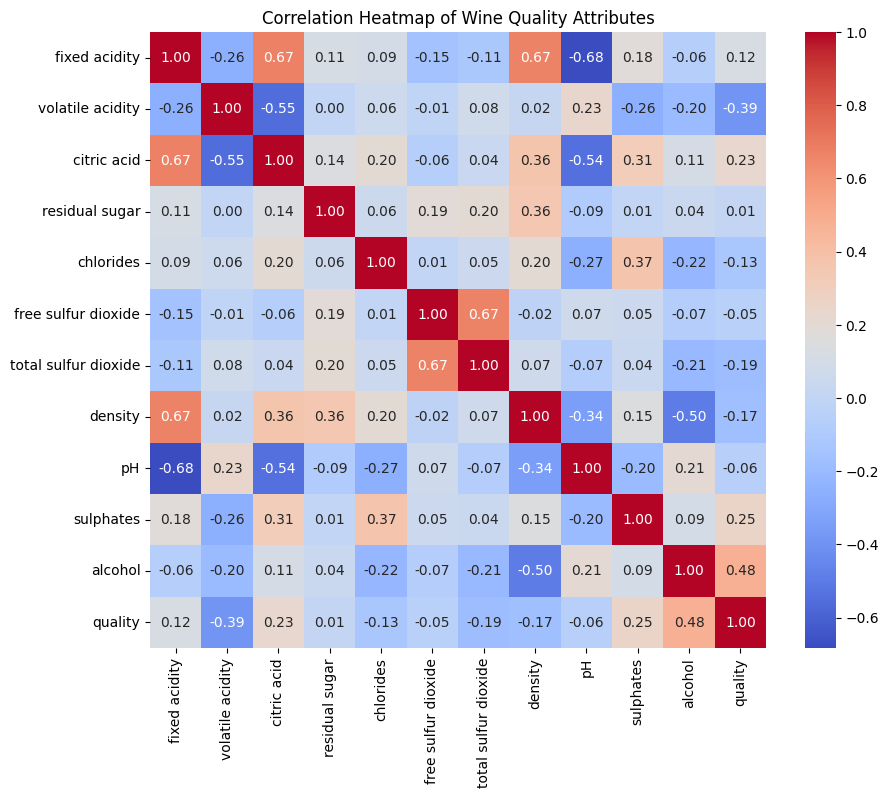

In [4]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Wine Quality Attributes')
plt.show()

In [5]:
# i tried to improve the accuracy by removing these columns, but the accuracy is still low
# X = df.iloc[:, :11].drop(columns=['fixed acidity', 'free sulfur dioxide'])

X = df.iloc[:, :11]
y = df['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf','linear','poly','sigmoid'],
              'svc__class_weight': ['balanced']} 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

model = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, refit=True)

start = time()
random_search.fit(X_train, y_train)
print("RandomSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(random_search.cv_results_["params"])))

print(random_search.best_params_)
print(random_search.best_estimator_)

predictions = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomSearchCV took 188.48 seconds for 10 candidate parameter settings.
{'svc__kernel': 'poly', 'svc__gamma': 1, 'svc__class_weight': 'balanced', 'svc__C': 10}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=1, kernel='poly'))])
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.19      0.14        16
           5       0.67      0.64      0.65       204
           6       0.60      0.55      0.58       192
           7       0.41      0.47      0.44        60
           8       0.10      0.20      0.13         5

    accuracy                           0.56       480
   macro avg       0.32      0.34      0.32       480
weighted avg       0.58      0.56      0.57       480



In [7]:
best_model = random_search.best_estimator_
best_model.score(X_train, y_train), model.score(X_test, y_test)

(0.9338695263628239, 0.6229166666666667)

# Problem a

In [8]:
y_pred_test = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
cfm = pd.DataFrame(
    confusion_matrix(y_test, y_pred_test, labels=range(11)), 
    index=range(11), 
    columns=range(11)
)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5583
Precision: 0.5834
Recall: 0.5583
F1 Score: 0.5695


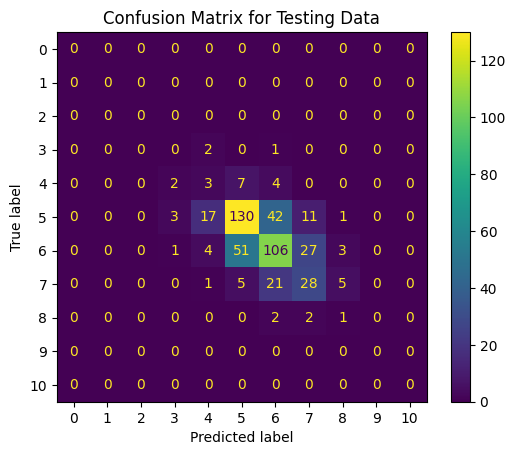

In [9]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cfm.values, display_labels=range(11))

cm_display.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

# Problem b

In [10]:
param_grid = {
    'svr__C': [0.1, 1, 10],  
    'svr__epsilon': [0.1, 0.2], 
    'svr__kernel': ['linear', 'rbf'], 
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

model = make_pipeline(StandardScaler(), SVR()).fit(X_train, y_train)
random_search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, refit=True)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(random_search.cv_results_["params"])))

print(random_search.best_params_)
print(random_search.best_estimator_)

predictions = random_search.best_estimator_.predict(X_test)


mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mad = mean_absolute_error(y_test, predictions) 

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Deviation (MAD): {mad:.4f}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomizedSearchCV took 0.37 seconds for 5 candidate parameter settings.
{'svr__kernel': 'rbf', 'svr__epsilon': 0.1, 'svr__C': 1}
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=1))])
Mean Squared Error (MSE): 0.3759
R-squared (R2): 0.4202
Mean Absolute Deviation (MAD): 0.4505


# Problem b answer

When I reworked the problem using regression and trained an SVR model, my accuracy are only around 50-60% no matter how many times i've ran the randomsearch, which falls short of the paper's results.

This initial outcome suggests that with additional hyperparameter tuning and model refinement, there's potential to improve the model's performance.

<hr>

### Based on your results, discuss the difference of treating this problem as classification or regression. How will this decision impact the users of your model?

My hyperparameter tuning attempt at finding the best settings for both the SVC and SVR models didn't turn out great as the accuracy on the test data was lower compared to what is in the paper.

Treating the problem as a classification problem vs a regression provides their own pros and cons. In classification, it's how the wines can be put in their respective category when the users of the model want to put them on their respective shelves with the same quality.

Regression, on the other hand, gives us a smoother scale, which will be harder for model users who are not that into wines. But to those who are wine connoisseurs, they might be keen to use the regression model.

Whether going for classification or regression, one should depend on what the people using the model need.

If they need clear categories, go with classification. If they want to capture all the little details, regression might be better.
